In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
ActiveUser = pd.read_csv("/content/Dataset - Active User Activeness Data (1).csv")

In [4]:
ActiveUser.head()

,user_id,form_based_active,table_based_active,report_based_active,approval_based_active,sign_documents_based_active,sentbox_based_active,smart_pdf_based_active,pdf_documents_based_active,apps_based_active,store_based_active,ai_agent_based_active,active_product_count,starting_product
0,4525038891,1,0,0,0,0,0,0,0,0,0,0,1,form
1,46640274621,1,1,0,0,0,0,0,1,0,0,0,3,form
2,46792022621,0,0,0,0,0,0,0,0,0,0,1,1,form
3,46619381621,1,0,0,1,0,0,0,0,1,0,0,3,form
4,46695422151,1,1,1,0,0,0,0,0,0,0,0,3,form


In [5]:
UserProfile = pd.read_csv("/content/Dataset - User Profile Data (1).csv")

In [6]:
UserProfile.head()

,user_id,user_created_at,status,account_type,is_paid,ever_paid,subscription_period,country_name,state,continent,...,payment_state,churned,churn_date,churn_type,is_AI_used,is_salesforce_app_user,unsubscribe_newsletter,unsubscribe_promotional,unsubscribe_educational,unsubscribe_inspirations
0,46681396501,2024-11-22 19:14:26,ACTIVE,FREE,0,0,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,4501810401,2020-02-05 18:47:35,ACTIVE,FREE,0,0,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,2292780,2011-09-19 6:02:37,DORMANT,FREE,0,0,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,46593405141,2024-09-05 6:34:29,ACTIVE,FREE,0,0,NaN,Algeria,Biskra,Africa,...,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,46800018311,2025-03-14 22:14:37,ACTIVE,FREE,0,0,NaN,Gambia,NaN,Africa,...,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_final = pd.merge(UserProfile, ActiveUser , on='user_id', how='left')

In [8]:
df_final.head()

,user_id,user_created_at,status,account_type,is_paid,ever_paid,subscription_period,country_name,state,continent,...,approval_based_active,sign_documents_based_active,sentbox_based_active,smart_pdf_based_active,pdf_documents_based_active,apps_based_active,store_based_active,ai_agent_based_active,active_product_count,starting_product
0,46681396501,2024-11-22 19:14:26,ACTIVE,FREE,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4501810401,2020-02-05 18:47:35,ACTIVE,FREE,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2292780,2011-09-19 6:02:37,DORMANT,FREE,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,46593405141,2024-09-05 6:34:29,ACTIVE,FREE,0,0,NaN,Algeria,Biskra,Africa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,46800018311,2025-03-14 22:14:37,ACTIVE,FREE,0,0,NaN,Gambia,NaN,Africa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_final.shape

(6209, 56)

In [10]:
df_final['active_product_count'] = df_final['active_product_count'].fillna(0)

In [11]:
df_final['active_product_count'].value_counts()

,count
active_product_count,
0.0,4429
2.0,587
1.0,521
3.0,390
4.0,164
5.0,72
6.0,34
7.0,11
8.0,1


Kullanıcının aktivite tablosunda olmaması, bir sistem hatası değil, bir davranış sonucudur. Eğer bir kullanıcı aktivite tablosunda yoksa, bu onun sıfır tane ürün kullandığı anlamına gelir. Yani bu veri kayıp değil, yokluğu temsil eden bir veridir. Bu yüzden NaN olan satırları 0 ile doldurdum.

In [12]:
df_final['is_activated'] = (df_final['active_product_count'] > 0).astype(int)

In [13]:
activation_rates = df_final.groupby('signup_on_mobile_device')['is_activated'].mean() * 100
activation_rates.index = ['Masaüstü/Web', 'Mobil']

In [14]:
activation_rates

,is_activated
Masaüstü/Web,38.030160
Mobil,8.401222


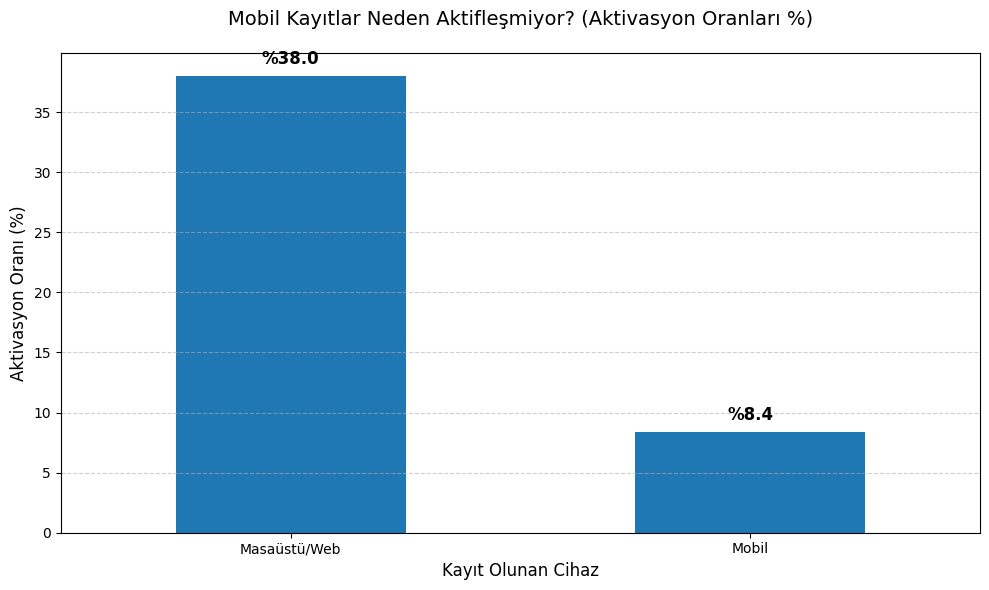

In [15]:
plt.figure(figsize=(10, 6))
bars = activation_rates.plot(kind='bar')

plt.title('Mobil Kayıtlar Neden Aktifleşmiyor? (Aktivasyon Oranları %)', fontsize=14, pad=20)
plt.ylabel('Aktivasyon Oranı (%)', fontsize=12)
plt.xlabel('Kayıt Olunan Cihaz', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, v in enumerate(activation_rates):
    plt.text(i, v + 1, f"%{v:.1f}", ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('mobil_vs_masaustu_aktivasyon.png')

Masaüstü/Web: Kayıt olan her 100 kişiden yaklaşık 39'u ürünü kullanmaya başlıyor.

Mobil: Kayıt olan her 100 kişiden sadece 8.5'i ürünü kullanıyor.

Mobil cihazdan kayıt olan kullanıcılar için süreç ya çok karmaşık ya da mobil uygulama deneyimi kullanıcının ürünü keşfetmesine engel oluyor. Pazarlama bütçesini mobilden ziyade masaüstüne kaydırmak veya mobil onboarding sürecini tamamen yeniden tasarlamak çözüm olabilir.

In [16]:
sector_analysis = df_final.groupby('industry').agg({
    'user_id': 'count',
    'is_paid': 'mean',
    'active_product_count': 'mean'
}).sort_values(by='user_id', ascending=False)

In [17]:
sector_analysis.head(10)

,user_id,is_paid,active_product_count
industry,,,
non-profit organizations,440,0.722727,1.736364
health care and social assistance,353,0.770538,1.815864
education,278,0.658273,1.636691
e-commerce & retail trade,155,0.548387,1.122581
sports & activities,143,0.713287,1.636364
finance,127,0.685039,1.535433
beauty & personal care,110,0.709091,1.263636
transportation,103,0.533981,1.145631
real estate & leasing,99,0.616162,1.282828


Yukarıdaki tabloya baktığımızda Kâr Amacı Gütmeyen Kuruluşlar ile Sağlık Hizmetleri ve Sosyal Yardım sektörlerinin toplam kulanıcıların büyük kısmını oluşturduğu görülmektedir. Bu alanlarda markanın bilinirliğinin yüksek olduğu söylenebilir.



In [18]:
sector_analysis.sort_values(by='is_paid', ascending=False).head(10)

,user_id,is_paid,active_product_count
industry,,,
telecommunications,7,1.000000,2.571429
"warehousing, storage & delivery",1,1.000000,0.000000
legal,17,0.882353,1.470588
insurance,38,0.868421,1.552632
engineering & architecture,7,0.857143,2.428571
"agriculture, farm animals & forestry",13,0.846154,2.000000
energy,11,0.818182,2.818182
animal care & products for animals,49,0.816327,1.551020
automotive,32,0.812500,1.625000


Burada, kullanıcı sayısı ilk tablodaki sektörler kadar fazla olmamasına rağmen inşaat sektöründeki ödeme oranı ve ürün kullanımının yüksek olduğu görülmektedir. İnşaat sektöründeki kullanıcıların ödeme yapmaya meyilli oldukları söylenebilir. Reklam bütçesini bu sektöre kaydırmak getiriyi arttırabilir.

In [19]:
product_cols = [
    'form_based_active', 'table_based_active', 'report_based_active',
    'approval_based_active', 'sign_documents_based_active', 'sentbox_based_active',
    'smart_pdf_based_active', 'pdf_documents_based_active', 'apps_based_active',
    'store_based_active', 'ai_agent_based_active'
]

In [20]:
product_conversions = {}
for col in product_cols:
    rate = df_final[df_final[col] == 1]['is_paid'].mean() * 100
    product_conversions[col] = rate

In [21]:
conversion_df = pd.Series(product_conversions).sort_values(ascending=False).reset_index()
conversion_df.columns = ['Ürün Özelliği', 'Ödeme Oranı (%)']

In [22]:
product_count_conv = df_final.groupby('active_product_count')['is_paid'].mean() * 100

/tmp/ipython-input-3951647832.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conversion_df, x='Ödeme Oranı (%)', y='Ürün Özelliği', palette='viridis')


(90.0, 100.0)

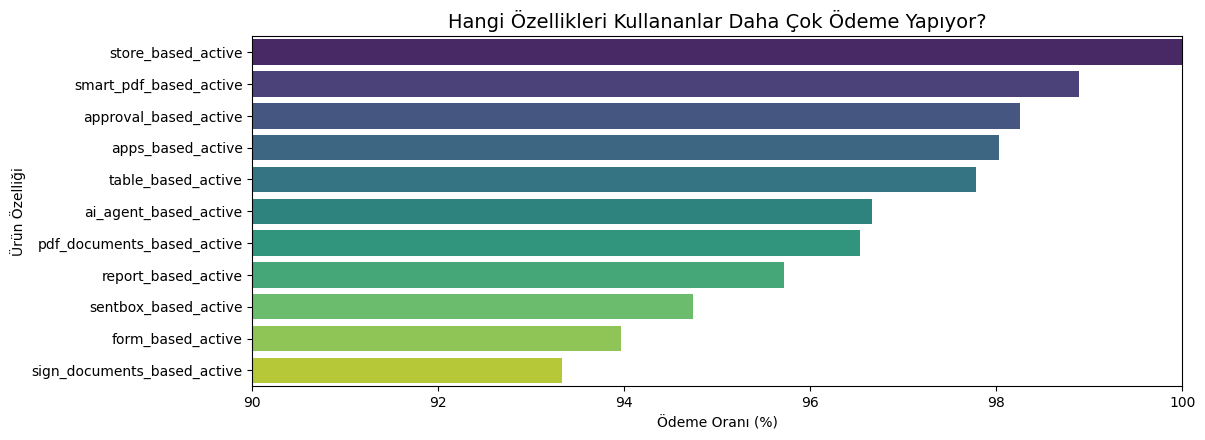

In [23]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
sns.barplot(data=conversion_df, x='Ödeme Oranı (%)', y='Ürün Özelliği', palette='viridis')
plt.title('Hangi Özellikleri Kullananlar Daha Çok Ödeme Yapıyor?', fontsize=14)
plt.xlim(90, 100)

Yukarıdaki analiz sonucunda approval_based_active özelliğini kullanan kullanıcıların yaklaşık %99'unun ücretli pakette olduğu görülmektedir.

Müşterilerin bu özelliğe ihtiyaç duydukları için ücretli pakete geçme olasılıklarının yüksek olduğu görülebilir.

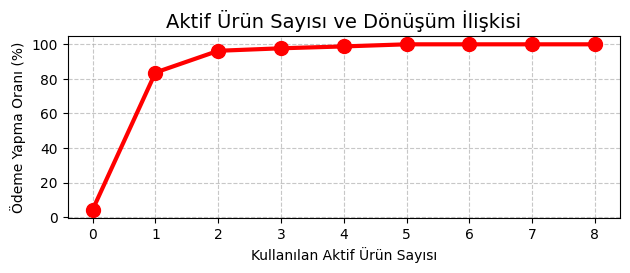

In [24]:
plt.subplot(2, 1, 2)
product_count_conv.plot(kind='line', marker='o', color='red', linewidth=3, markersize=10)
plt.title('Aktif Ürün Sayısı ve Dönüşüm İlişkisi', fontsize=14)
plt.ylabel('Ödeme Yapma Oranı (%)')
plt.xlabel('Kullanılan Aktif Ürün Sayısı')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Grafiğe baktığımızda, active_product_count 0'dan 1'e çıktığında ödeme oranı %4'ten %90'lara çıkıyor. Diğer kırılma ise 1 üründen 2 ürüne geçiş aşamasında yaşanıyor. Bu grafiğe göre ikinci ürünün kullanıcının platformdan çıkışını zorlaştırdığı söylenebilir.

In [25]:
active_users = df_final[df_final['starting_product'].notnull()].copy()

In [26]:
starting_stats = active_users.groupby('starting_product').agg(
    toplam_kullanici=('is_paid', 'count'),
    odeme_yapanlar=('is_paid', 'sum'),
    odeme_orani_yuzde=('is_paid', 'mean')
)

In [27]:
starting_stats['odeme_orani_yuzde'] = starting_stats['odeme_orani_yuzde'] * 100

In [28]:
starting_stats_sorted = starting_stats.sort_values(by='odeme_orani_yuzde', ascending=False)

print("--- BAŞLANGIÇ ÜRÜNÜNE GÖRE DÖNÜŞÜM ANALİZİ ---")
print(starting_stats_sorted)

--- BAŞLANGIÇ ÜRÜNÜNE GÖRE DÖNÜŞÜM ANALİZİ ---
                  toplam_kullanici  odeme_yapanlar  odeme_orani_yuzde
starting_product                                                     
APPS                             9               9         100.000000
approval                         1               1         100.000000
tables                           2               2         100.000000
report                           1               1         100.000000
form                          1722            1612          93.612079
pdf                             31              28          90.322581
SIGN                            13               9          69.230769
unknown                          1               0           0.000000


Başlangıç ürünlerine bakıldığında AI_AGENTS, approval, report, tables ürünleriyle başlandığında başarı oranın %100 olduğu görülmektedir. Kullanıcı sayısı az olsa da getirdikleri değer çok yüksektir.

Form ürüne bakıldığında şirketin en çok kullanılan ürünü olduğu görülmektedir.

Kullanıcı imza için geldiğinde işini bitirip sistemden çıkıyor olabilir. Yani ürünün diğer özelliklerini (Form, Table vb.) keşfetmeden gidiyor. İlk adımı SIGN olan kullanıcılara, belge imzalatma bittikten hemen sonra "Bunu otomatik bir onay sürecine bağlamak ister misiniz?" veya "İmzalı belgeleri bir Tablo'da raporlayalım mı?" diye sormalıyız. Yani onları %76'lık gruptan alıp %100'lük "Approval" veya "Report" grubuna taşımalıyız.


In [29]:
ghost_paid_df = df_final[(df_final['is_paid'] == 1) & (df_final['active_product_count'] == 0)].copy()

In [30]:
total_paid = df_final[df_final['is_paid'] == 1].shape[0]
total_ghost = ghost_paid_df.shape[0]
ghost_ratio = (total_ghost / total_paid) * 100
print(f"Toplam Ücretli Kullanıcı: {total_paid}")
print(f"Hayalet Ödeyen Kullanıcı Sayısı: {total_ghost}")
print(f"Risk Altındaki Gelir Oranı (Churn Risk): %{ghost_ratio:.2f}")

Toplam Ücretli Kullanıcı: 1857
Hayalet Ödeyen Kullanıcı Sayısı: 195
Risk Altındaki Gelir Oranı (Churn Risk): %10.50


Ücretli kullanıcılarınızın yaklaşık %11'inin şu an ürünü kullanmadığı görülmektedir.

In [31]:
ghost_industry = ghost_paid_df['industry'].value_counts().head(10)

In [32]:
ghost_account = ghost_paid_df['account_type'].value_counts()

/tmp/ipython-input-2523567418.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ghost_industry.values, y=ghost_industry.index, palette='Reds_r')


Text(0.5, 0, 'Kullanıcı Sayısı')

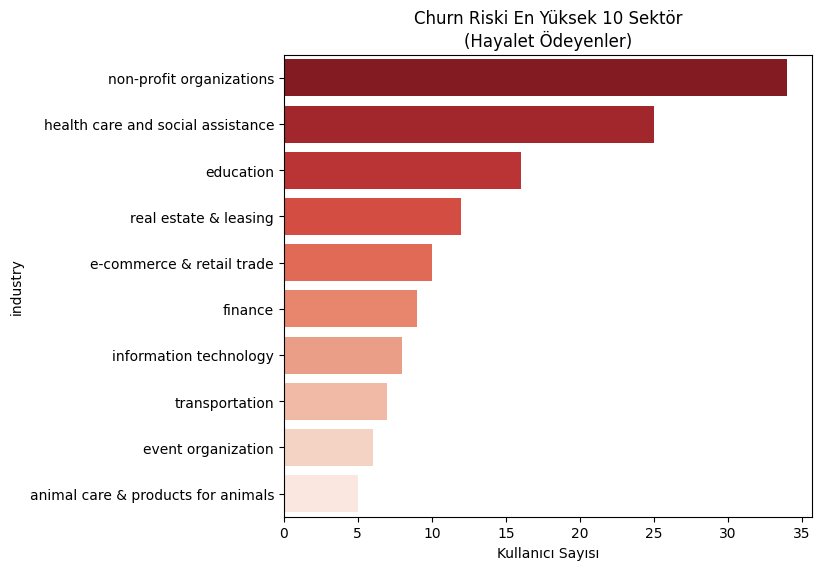

In [33]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=ghost_industry.values, y=ghost_industry.index, palette='Reds_r')
plt.title('Churn Riski En Yüksek 10 Sektör\n(Hayalet Ödeyenler)', fontsize=12)
plt.xlabel('Kullanıcı Sayısı')

Sağlık ve Kâr Amacı Gütmeyen Kuruluşlar sektörlerinw baktığımızda hayalet kullanıcı sayısı fazladır. Bu kitle muhtemelen güvenlik veya karmaşıklık bariyerine takılmıştır. Bu sektöre özel olarak "Nasıl Başlanır?" kılavuzu göndermek faydalı olabilir. Bu sayede bu kullanıcıları tekrar kazanabiliriz.

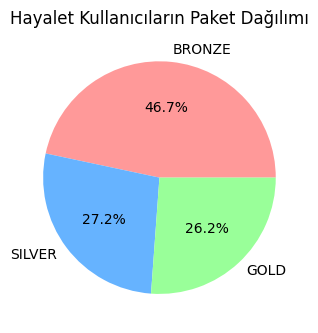

In [34]:
plt.subplot(1, 2, 2)
plt.pie(ghost_account, labels=ghost_account.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Hayalet Kullanıcıların Paket Dağılımı', fontsize=12)

plt.tight_layout()
plt.show()

Bronze paketindeki hayalet müşteri sayısı diğer segmentlere göre daha fazladır. Bu durumun önemsiz olduğu söylenemez ancak hayalet kullanıcı sayısının Gold segmentte az olması daha yüksek ödeme yapıp hizmet aldıklarından dolayı önemli bir çıkarımdır.

Hayalet Kullanıcıları Kazanmak İçin

Hayalet kullanıcıların sektörlerine göre özelleştirilmiş "Ürünü hala kullanmadınız, sizlere yardımcı olmamızı ister misiniz?" e-postaları gönderilebilir.

Özellikle hayalet oranının yüksek olduğu paketlerdeki kullanıcılara, sistem içerisinde "İlk formunuzu 30 saniyede oluşturun" gibi interaktif mesajlarla ürüne bağlayabiliriz.


In [35]:
top_countries = df_final['country_name'].value_counts().head(15).index
country_analysis = df_final[df_final['country_name'].isin(top_countries)].groupby('country_name')['is_activated'].mean().sort_values(ascending=False)

In [36]:
top_languages = df_final['user_language'].value_counts().head(10).index
lang_analysis = df_final[df_final['user_language'].isin(top_languages)].groupby('user_language')['is_activated'].mean().sort_values(ascending=False)

/tmp/ipython-input-3056786186.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_analysis.values, y=country_analysis.index, palette='viridis')


Text(0.5, 0, 'Aktivasyon Oranı (0.0 - 1.0)')

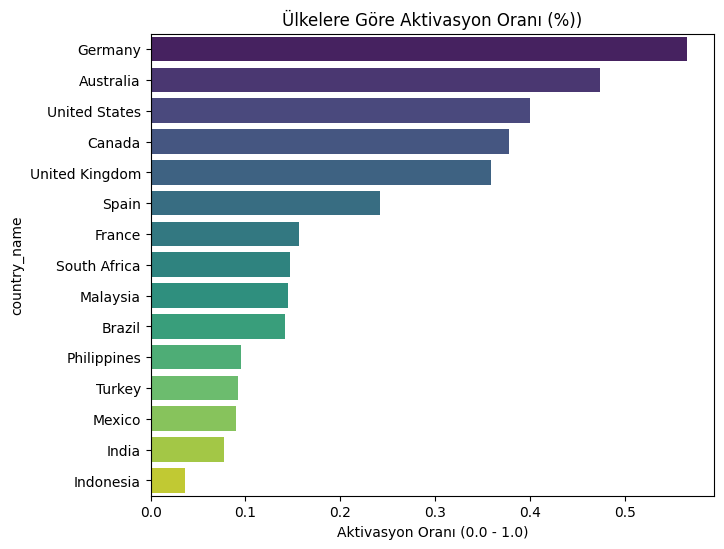

In [37]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=country_analysis.values, y=country_analysis.index, palette='viridis')
plt.title('Ülkelere Göre Aktivasyon Oranı (%))')
plt.xlabel('Aktivasyon Oranı (0.0 - 1.0)')

Grafiğe bakarsak henüz ürünü global bir ürün olarak tanımlayamayız, daha çok bölgesel başarılar elde ediyoruz. %20 aktivasyonun altında kalan ülkelerde yerelleştirme için çalışmalar yapmamız gerekebilir. Büyüme için bu ülkelerin dinamik yapısına göre hareket etmeliyiz.

Grafikte en düşük yüzdeliğe sahip olan Hindistan ve Endonezya için başarısızlık sebeplerini inceleyelim.

In [41]:
target_countries = ['India', 'Indonesia']
df_final['is_activated'] = (df_final['active_product_count'] > 0).astype(int)

In [42]:
regional_df = df_final[df_final['country_name'].isin(target_countries)].copy()

In [43]:
lang_check = regional_df.groupby(['country_name', 'user_language'])['is_activated'].mean().unstack().fillna(0)

In [44]:
start_prod_check = regional_df.groupby('starting_product')['is_activated'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(5)

Text(0.5, 1.0, 'India & Indonesia: Dile Göre Aktivasyon Oranları (Heatmap)')

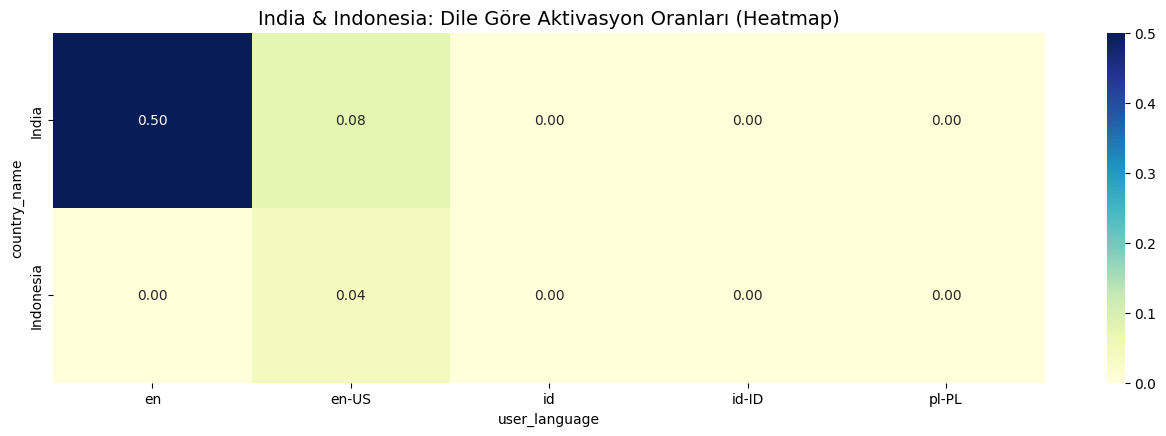

In [45]:
plt.figure(figsize=(16, 10))
plt.subplot(2, 1, 1)
sns.heatmap(lang_check, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('India & Indonesia: Dile Göre Aktivasyon Oranları (Heatmap)', fontsize=14)

Grafikte de görüldüğü gibi temel sorun Localization eksikliğidir. Ürünü bu dillerde tam destekli hale getirmeden bu bölgelerde pazarlama bütçesini artırmak, doğru bir strateji olmaz.

/tmp/ipython-input-289479820.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=start_prod_check.index, y=start_prod_check['count'], palette='flare', alpha=0.6, label='Toplam Kayıt')


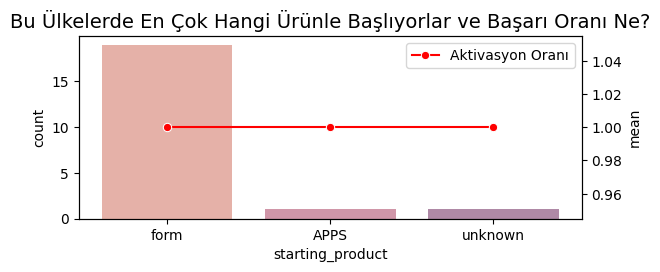

In [46]:
plt.subplot(2, 1, 2)
sns.barplot(x=start_prod_check.index, y=start_prod_check['count'], palette='flare', alpha=0.6, label='Toplam Kayıt')
ax2 = plt.gca().twinx()
sns.lineplot(x=start_prod_check.index, y=start_prod_check['mean'], color='red', marker='o', label='Aktivasyon Oranı', ax=ax2)
plt.title('Bu Ülkelerde En Çok Hangi Ürünle Başlıyorlar ve Başarı Oranı Ne?', fontsize=14)

plt.tight_layout()
plt.show()

Bu ülkelerde kullanıcılar form ürünüyle başlıyorlar, veriyi topladıktan sonra ürüne ihtiyaç duymadıkları için aktivasyon oranlarının globalin altında kaldığı söylenebilir. Daha profesyonel ürünlerin kullanılması ile kullanıcıları ürünlere bağlayarak gelir elde edebiliriz.

/tmp/ipython-input-1087980798.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lang_analysis.values, y=lang_analysis.index, palette='magma')


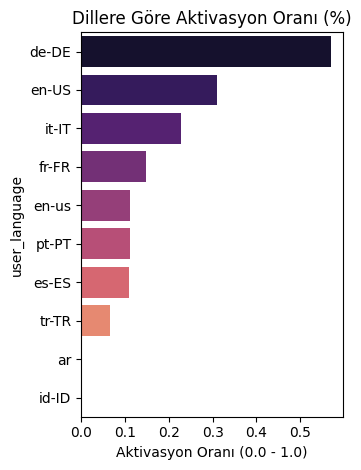

In [40]:
plt.subplot(1, 2, 2)
sns.barplot(x=lang_analysis.values, y=lang_analysis.index, palette='magma')
plt.title('Dillere Göre Aktivasyon Oranı (%)')
plt.xlabel('Aktivasyon Oranı (0.0 - 1.0)')
plt.tight_layout()
plt.show()

Grafiğe göre, ürünün Alman iş kültüründeki süreç yönetimi ihtiyacını çok iyi karşıladığını gösterir. Alman kullanıcılar genellikle bir ürünü iş süreçlerini dijitalleştirmek için kullanır. Aktivasyonun bu kadar yüksek olması, ürünün arayüz mantığının Alman kullanıcısının beklentisiyle tam olarak örtüştüğünü kanıtlar.

Grafikte İngilizce'nin ikinci sırada olmasının sebebi İngilizce kullanan pazarın çeşitliliğindedir.Hindistan, Endonezya ve Filipinler gibi pazarlardan gelen ve aktivasyonu düşük olan kitleler, İngilizce havuzunun genel ortalamasını aşağı çekiyor.

In [39]:
print("Dili İngilizce OLMAYAN ülkelerdeki genel durum:")
non_eng_countries = df_final[df_final['user_language'] != 'English'].groupby('country_name')['is_activated'].mean().sort_values().head(10)
print(non_eng_countries)

Dili İngilizce OLMAYAN ülkelerdeki genel durum:
country_name
Afghanistan          0.0
Albania              0.0
Angola               0.0
Belarus              0.0
Bahrain              0.0
Bangladesh           0.0
Barbados             0.0
Azerbaijan           0.0
Brunei Darussalam    0.0
Cambodia             0.0
Name: is_activated, dtype: float64


Bu ülkelerdeki %0 aktivasyon oranı, bize ürünün herkes için uygun olmadığını gösteriyor. Bu ülkelerde öncelikle ürünün teknik performansı gibi diğer etkenlere odaklanmalıyız.

In [48]:
multi_prod_analysis = df_final.groupby('active_product_count').agg(
    toplam_kullanici=('is_paid', 'count'),
    odeme_yapanlar=('is_paid', 'sum'),
    odeme_orani=('is_paid', 'mean')
).reset_index()

In [49]:
correlation = df_final['active_product_count'].corr(df_final['is_paid'])

In [54]:
float(correlation)

0.7712967281972265

/tmp/ipython-input-4228514884.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=multi_prod_analysis, x='active_product_count', y='odeme_orani', palette='coolwarm')


Text(0.5, 0, 'Kullanılan Aktif Ürün Sayısı')

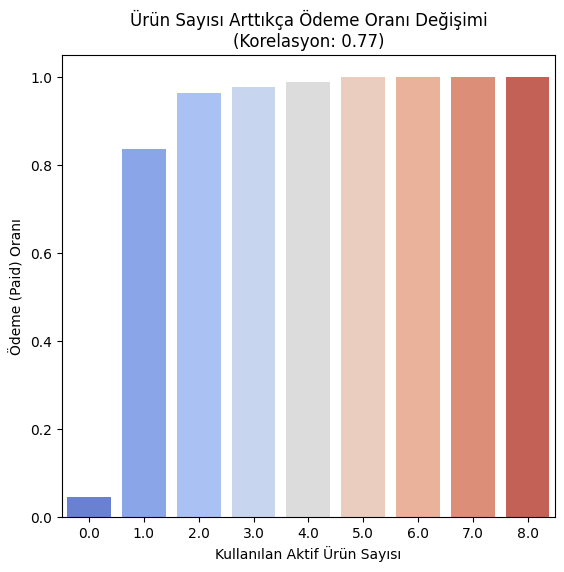

In [51]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=multi_prod_analysis, x='active_product_count', y='odeme_orani', palette='coolwarm')
plt.title(f'Ürün Sayısı Arttıkça Ödeme Oranı Değişimi\n(Korelasyon: {correlation:.2f})')
plt.ylabel('Ödeme (Paid) Oranı')
plt.xlabel('Kullanılan Aktif Ürün Sayısı')

Grafiğe baktığımızda ürün sayısı arttıkça ödeme oranının da artığı görülmektedir. Her yeni ürünün kullanıcıyı daha çok bağladığı yorumu yapılabilir.

Ücretsiz kullanıcıları ödeme yapmaya yönlendirmek yerine, onları ikinci veya üçüncü bir ürünü denemeye teşvik etmek, dolaylı yoldan ödeme oranını arttıracağı için bu yöntem denenebilir. Örneğin bir kullanıcı form kullanıyorsa ona otomatik olarak tables gibi tamamlayıcı ürünler önerilebilir.

In [57]:
print("--- ÜRÜN ADAPTASYON ÖZETİ ---")
print(multi_prod_analysis)

--- ÜRÜN ADAPTASYON ÖZETİ ---
   active_product_count  toplam_kullanici  odeme_yapanlar  odeme_orani
0                   0.0              4429             195     0.044028
1                   1.0               521             436     0.836852
2                   2.0               587             565     0.962521
3                   3.0               390             381     0.976923
4                   4.0               164             162     0.987805
5                   5.0                72              72     1.000000
6                   6.0                34              34     1.000000
7                   7.0                11              11     1.000000
8                   8.0                 1               1     1.000000


Özet tablomuza baktığımızda ürün almayan 4429 kullanıcı görülmektedir. İlk olarak amacımız bu kullanıcıları aktif hale getirmek olmalıdır.

Diğer önceliğimiz 1 ürün almış 521 kullanıcıya aldıkları ürüne göre tamamlayıcı olacak ikinci ürünün reklamını yapmak olmalıdır.

4 ve üzeri ürün alan kullanıcıları ise korumamız gerekir, onlara özel kampanyalar yapılabilir.

In [59]:
df_final['user_created_at'] = pd.to_datetime(df_final['user_created_at'])
df_final['first_upgrade'] = pd.to_datetime(df_final['first_upgrade'])

In [62]:
upgraded_users = df_final[df_final['first_upgrade'].notnull()].copy()

In [63]:
upgraded_users['days_to_upgrade'] = (upgraded_users['first_upgrade'] - upgraded_users['user_created_at']).dt.days

In [64]:
upgraded_users = upgraded_users[upgraded_users['days_to_upgrade'] >= 0]

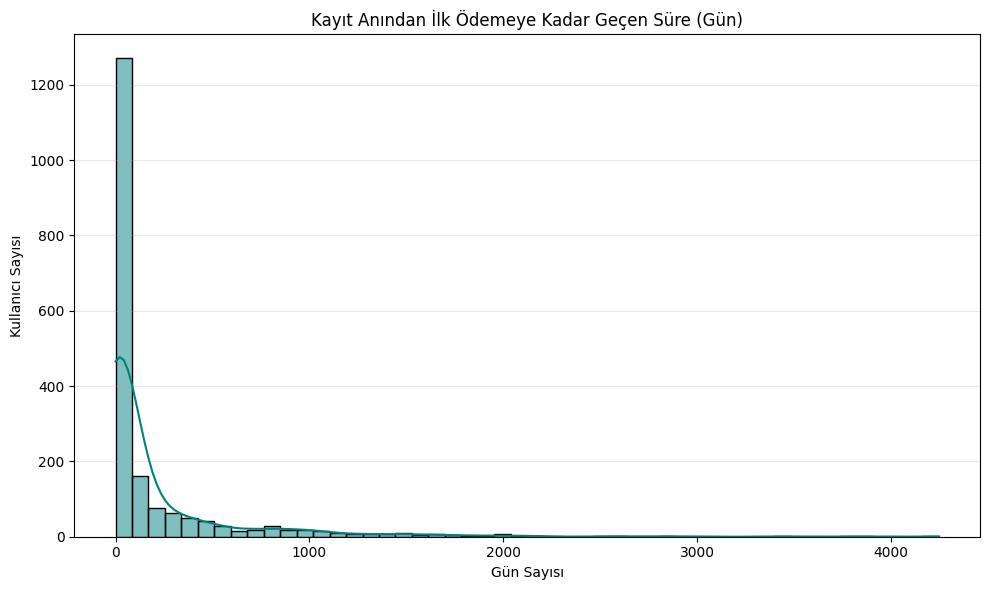

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(upgraded_users['days_to_upgrade'], bins=50, kde=True, color='teal')
plt.title('Kayıt Anından İlk Ödemeye Kadar Geçen Süre (Gün)')
plt.xlabel('Gün Sayısı')
plt.ylabel('Kullanıcı Sayısı')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Dağılımın net şekilde sağa çarpık olduğu görülmektedir. Kullanıcıların büyük çoğunluğu kayıt olduktan kısa süre sonra ilk ödemesini yapmaktadır. İlk bir kaç hafta ödeme kararının verildiği en kritik dönem olarak görülür.


Sola doğru uzanan uzun kuyruk uzun süre ücretsiz kullanıp sonra ihtiyaç duyan ve ödeme yapan kullanıcıları temsil etmektedir. Bu sebeple bu grafikte ortalama yanıltıcı olur, medyan daha kritik bir bulgudur.

In [69]:
print(f"Medyan : {upgraded_users['days_to_upgrade'].median()} gün")

Medyan : 20.0 gün


Bu çıktı ile upgrade olan kullanıcıların %50’sinin,
kayıttan sonraki ilk 20 gün içinde ilk ödemesini yaptığını görebiliriz.

In [97]:
features = ['country_name', 'industry', 'user_language', 'starting_product', 'active_product_count']
X = df_final[features].copy()
y = df_final['is_paid']

In [98]:
X['starting_product'] = X['starting_product'].fillna('Unknown')
X['active_product_count'] = X['active_product_count'].fillna(0)

In [99]:
X_encoded = pd.get_dummies(X, columns=['country_name', 'industry', 'user_language', 'starting_product'])

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [101]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [103]:
y_pred = rf_model.predict(X_test)
print("\n--- Model Performans Raporu ---")
print(classification_report(y_test, y_pred))


--- Model Performans Raporu ---
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       858
           1       0.94      0.87      0.91       384

    accuracy                           0.94      1242
   macro avg       0.94      0.92      0.93      1242
weighted avg       0.94      0.94      0.94      1242



Modelimiz %94 isabet oranıyla çalışıyor. Özellikle kaybedeceğimiz kullanıcıları önceden tespit etme konusunda kusursuzuz. Ancak ödeme yapma potansiyeli olanların %13'ünü hala tam tanımlayamıyoruz. Bu da demek oluyor ki, verimizde henüz keşfetmediğimiz yeni bir kullanıcı profili oluşmaya başlıyor olabilir.

In [86]:
importances = rf_model.feature_importances_
feature_names = X_encoded.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

In [89]:
pd.DataFrame(top_10_features)

,Feature,Importance
0,active_product_count,0.265498
232,starting_product_Unknown,0.254184
234,starting_product_form,0.249623
145,country_name_United States,0.024230
170,industry_health care and social assistance,0.023847
178,industry_non-profit organizations,0.023198
162,industry_education,0.010990
196,user_language_en-US,0.010210
168,industry_finance,0.006837
159,industry_construction,0.006228


/tmp/ipython-input-3321659036.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='magma')


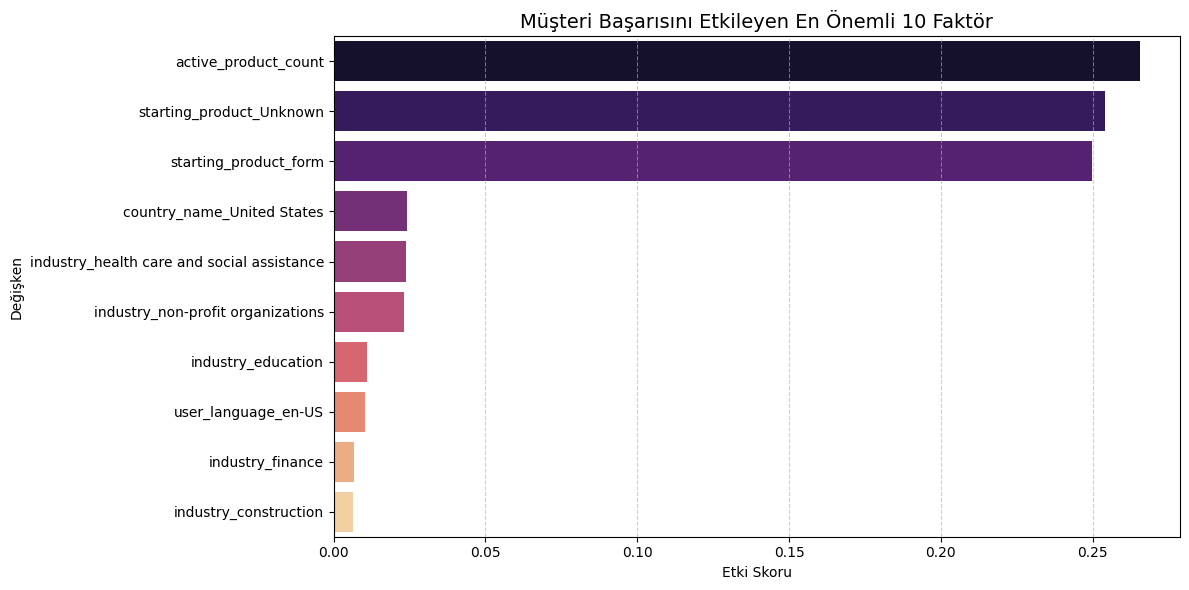

In [105]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='magma')
plt.title('Müşteri Başarısını Etkileyen En Önemli 10 Faktör', fontsize=14)
plt.xlabel('Etki Skoru')
plt.ylabel('Değişken')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Modelde en belirleyici faktör, kullanıcının aktif ürün sayısıdır. Başlangıçta kullanılan ürün tipi de ödeme davranışını güçlü biçimde etkilemektedir. Coğrafya ve sektör değişkenleri ikincil ama anlamlı katkı sağlamaktadır. Sonuçlar, erken dönemde ürün kullanım derinliğinin ödeme dönüşümünde kritik rol oynadığını göstermektedir.